# BENCHMARK CHOICE


In [1]:
import sys
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
from IPython.display import display
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import gradCAM_keras
from gradCAM_keras import get_img_array, make_gradcam_heatmap

Using TensorFlow backend.


# GRAD-CAM

## 1. Xception model - gradCAM1

In [2]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

In [3]:
last_conv_layer_name = "block14_sepconv2_act"
classifier_layer_names = [
    "avg_pool",
    "predictions",
]

# The local path to our target image
# img_path = keras.utils.get_file(
#     "african_elephant.jpg", " https://i.imgur.com/Bvro0YD.png"
# )

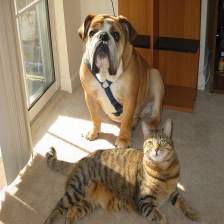

In [4]:
img_path="./cat_dog.PNG"
display(Image(img_path))

In [5]:
# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Make model
model = model_builder(weights="imagenet")

# Print what the top predicted class is
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])
model.summary()

Predicted: [('n02108422', 'bull_mastiff', 0.21789525)]
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
____________________________________

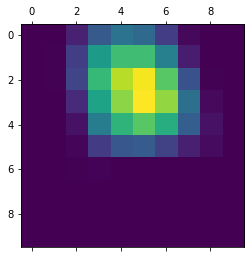

In [6]:
# Generate class activation heatmap
heatmap = make_gradcam_heatmap(
    img_array, model, last_conv_layer_name, classifier_layer_names
)

# Display heatmap
plt.matshow(heatmap)
plt.show()

In [7]:
"""
## Create a superimposed visualization
"""

# We load the original image
img = keras.preprocessing.image.load_img(img_path)
img = keras.preprocessing.image.img_to_array(img)

# We rescale heatmap to a range 0-255
heatmap = np.uint8(255 * heatmap)

# We use jet colormap to colorize heatmap
jet = cm.get_cmap("jet")

# We use RGB values of the colormap
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]

# We create an image with RGB colorized heatmap
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

# Superimpose the heatmap on original image
superimposed_img = jet_heatmap * 0.4 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

In [8]:
# Save the superimposed image
save_path = "./cat_dog_cam.jpg"
superimposed_img.save(save_path)

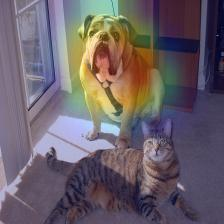

In [9]:
# Display Grad CAM
display(Image(save_path))

## 2. VGG and gradCAM-2

In [10]:
import guided_grad_cam
from guided_grad_cam import load_image, deprocess_image, normalize,build_guided_model, guided_backprop, grad_cam, grad_cam_batch, compute_saliency

In [11]:
from keras.applications.vgg16 import VGG16

In [12]:
model = VGG16(include_top=True, weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
guided_model = build_guided_model()

In [66]:
image_path = "./cat_dog.png"

In [15]:
pre_processed_input = load_image(image_path, H=224, W=224)
gradcam, gb, guided_gradcam = compute_saliency(model, guided_model, preprocessed_input, layer_name='block5_conv3',
                                                   img_path=image_path, cls=-1, visualize=True, save=True)

TypeError: compute_saliency() missing 1 required positional argument: 'preprocessed_input'

## UTILS

In [68]:

def process_image(path, model, H, W,  preprocess=True):
    """Load and preprocess image."""
    x = image.load_img(path, target_size=(H, W))
    if preprocess:
        x = image.img_to_array(x)
        x = np.expand_dims(x, axis=0)
        x = model.preprocess_input(x)
    return x

## 3. INCEPTION GRAD-CAM



In [55]:
from keras.applications import inception_v3
model = inception_v3.InceptionV3(weights='imagenet')
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_659 (Conv2D)             (None, 149, 149, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
batch_normalization_659 (BatchN (None, 149, 149, 32) 96          conv2d_659[0][0]                 
__________________________________________________________________________________________________
activation_659 (Activation)     (None, 149, 149, 32) 0           batch_normalization_659[0][0]    
_______________________________________________________________________________________

In [47]:
guided_model = build_guided_model()

In [69]:
preprocessed_input = process_image(image_path, inception_v3, H=299, W=299)
preprocessed_input.shape

(1, 299, 299, 3)

Model prediction:
	bull_mastiff   	(243)	with probability 0.450
	tiger_cat      	(282)	with probability 0.057
	boxer          	(242)	with probability 0.045
	tabby          	(281)	with probability 0.031
	doormat        	(539)	with probability 0.007
Explanation for 'bull_mastiff'


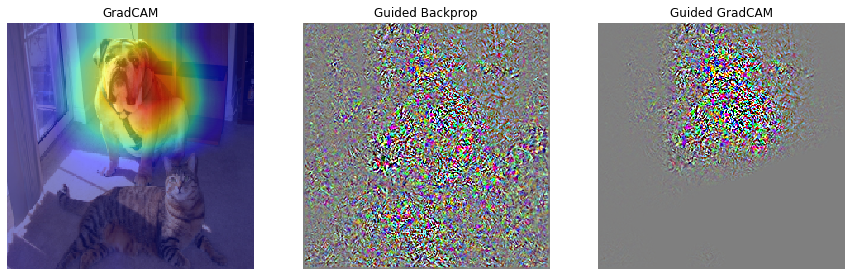

In [70]:
gradcam, gb, guided_gradcam = compute_saliency(model, guided_model, image_path, preprocessed_input, layer_name='mixed10',
                                                    cls=-1, visualize=True, save=True)

numpy.ndarray

# LIME

('n02108422', 'bull_mastiff', 0.44994292)
('n02123159', 'tiger_cat', 0.057207588)
('n02108089', 'boxer', 0.045161325)
('n02123045', 'tabby', 0.03056905)
('n03223299', 'doormat', 0.0071833027)


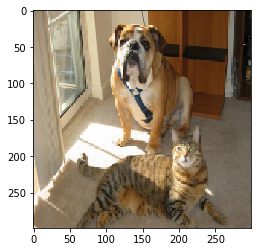

In [71]:
plt.imshow(preprocessed_input[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

In [72]:
%load_ext autoreload
%autoreload 2
import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
explainer = lime_image.LimeImageExplainer()

In [74]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(images[0], inet_model.predict, top_labels=10, hide_color=None, num_samples=1000)


Wall time: 9min 22s


In [40]:
from skimage.segmentation import mark_boundaries

In [41]:
#decode_predictions(explanation.top_labels)
labels=np.zeros([1, 1000])
for index, el in enumerate(explanation.top_labels):
    labels[0, el]=1000-index
decode_predictions(labels, top=10)

[[('n02108422', 'bull_mastiff', 1000.0),
  ('n02123159', 'tiger_cat', 999.0),
  ('n02108089', 'boxer', 998.0),
  ('n02123045', 'tabby', 997.0),
  ('n03223299', 'doormat', 996.0),
  ('n02129604', 'tiger', 995.0),
  ('n02108915', 'French_bulldog', 994.0),
  ('n02093428', 'American_Staffordshire_terrier', 993.0),
  ('n02124075', 'Egyptian_cat', 992.0),
  ('n02110958', 'pug', 991.0)]]

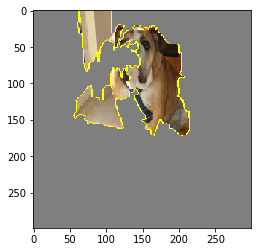

In [42]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=6, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

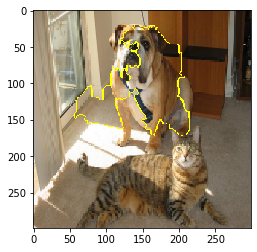

In [43]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))